In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from solutions_biv import additionalplot_solution_1, additionalplot_solution_2

We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### **Task 1**: 
Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

**Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [3]:
fuel_econ['make'].unique()

array(['Nissan', 'Volkswagen', 'Chevrolet', 'Lexus', 'Hyundai', 'Lincoln',
       'Mazda', 'Ford', 'Kia', 'Porsche', 'Scion', 'Subaru', 'Bentley',
       'Audi', 'Buick', 'Cadillac', 'Dodge', 'Infiniti',
       'Roush Performance', 'Volvo', 'BMW', 'Jaguar', 'Mercedes-Benz',
       'Maserati', 'Rolls-Royce', 'MINI', 'Chrysler', 'Mitsubishi',
       'Toyota', 'Ferrari', 'Fiat', 'Suzuki', 'Acura', 'Honda', 'Lotus',
       'Aston Martin', 'Genesis', 'Alfa Romeo', 'Karma'], dtype=object)

In [4]:
# the order in which we want to display the Facets
car_companies = ['Toyota', 'Honda', 'Mazda', 'Hyundai', 'Kia', 'MINI', 'Volkswagen',
                 'Chevrolet','Ford', 'Lexus', 'Audi', 'BMW', 'Infiniti', 'Dodge', 'Cadillac',
                 'Mercedes-Benz', 'Porsche', 'Jaguar']
mask = fuel_econ['make'].isin(car_companies)
fuel_econ = fuel_econ[mask]
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


In [5]:
# Try this along with all the libraries you are importing:
import warnings
warnings.filterwarnings("ignore")

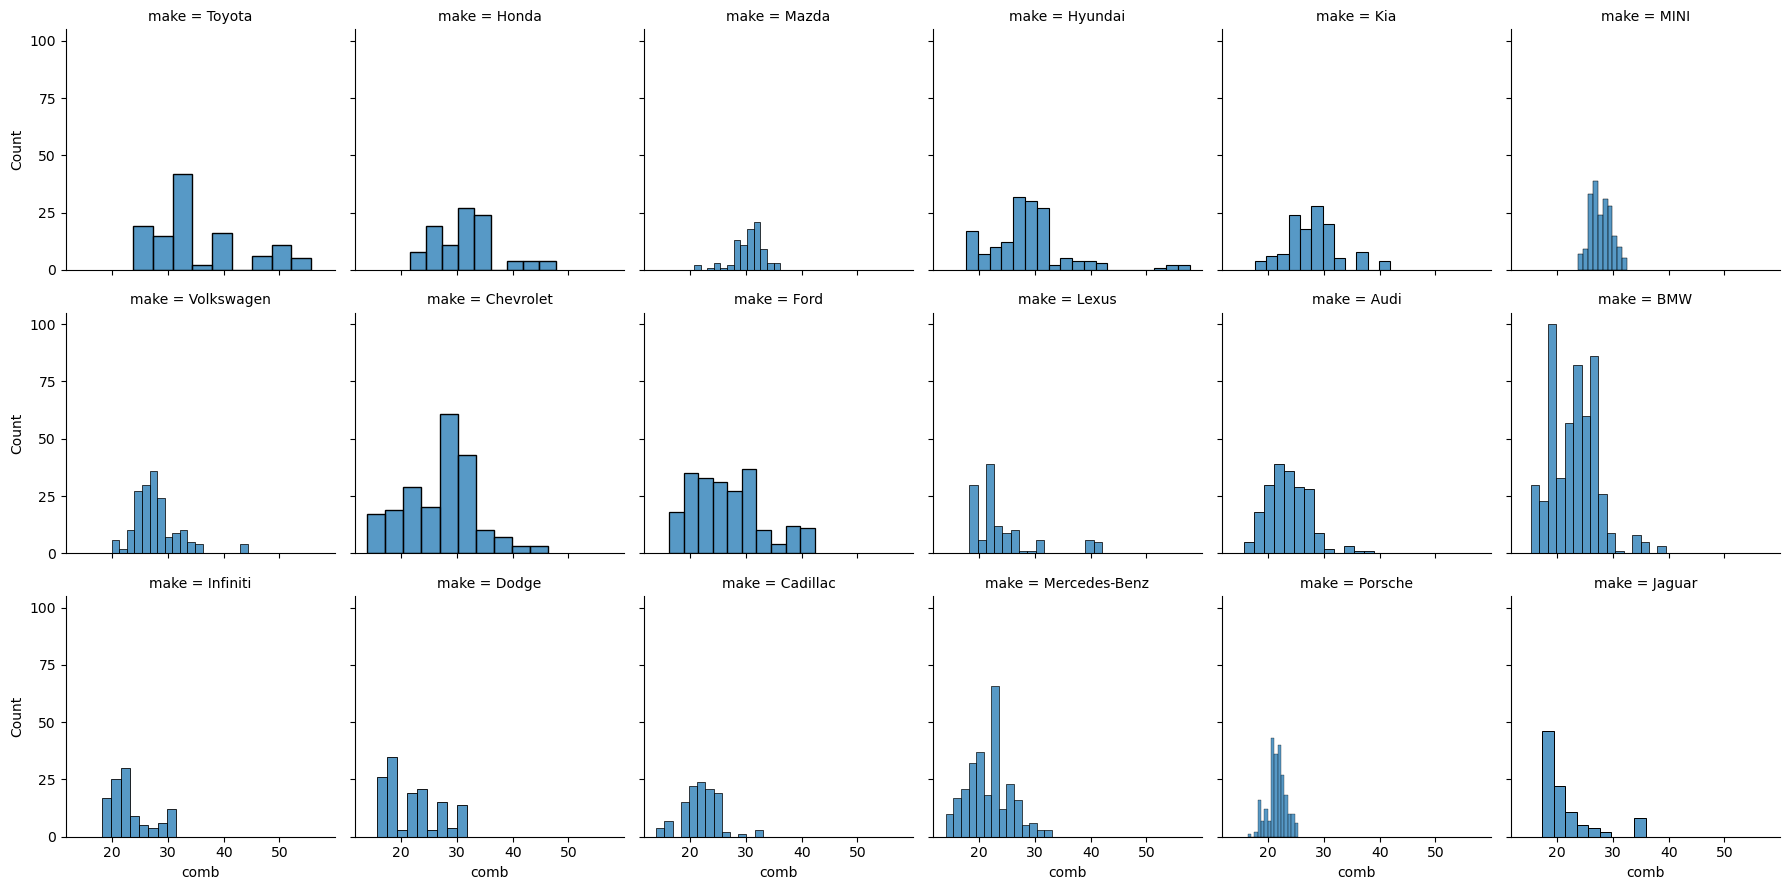

In [11]:
# YOUR CODE HERE
comb_mean = fuel_econ[['make', 'comb']].groupby(['make']).mean()
comb_order = comb_mean.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable comb_order
g = sns.FacetGrid(data=fuel_econ, col='make', col_wrap=6, col_order=comb_order)
g.map(sns.histplot, 'comb')
plt.yticks(ticks=[0, 25, 50, 75, 100], labels=[0, 25, 50, 75, 100]);

In [ ]:
# run this cell to check your work against ours
additionalplot_solution_1()

### **Task 2**: 
Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

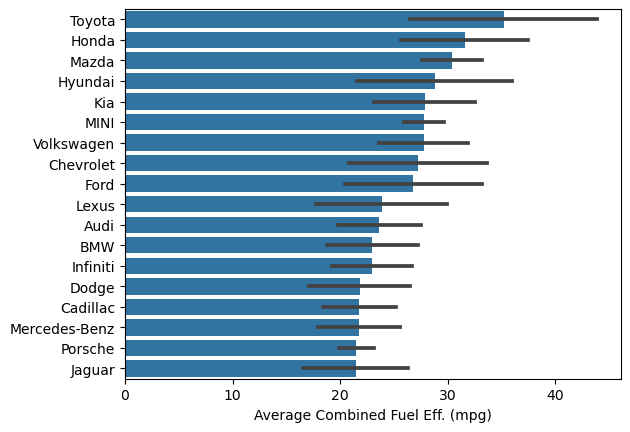

In [7]:
# YOUR CODE HERE
base_color = sns.color_palette()[0]
sns.barplot(data=fuel_econ, x='comb', y='make', order=comb_order, color=base_color, errorbar='sd')
plt.xlabel("Average Combined Fuel Eff. (mpg)")
plt.ylabel(None);

Seaborn's barplot function makes short work of this exercise. Since there are a lot of 'make' levels, I've made it a horizontal bar chart. In addition, I've set the error bars to represent the standard deviation of the car mileages.


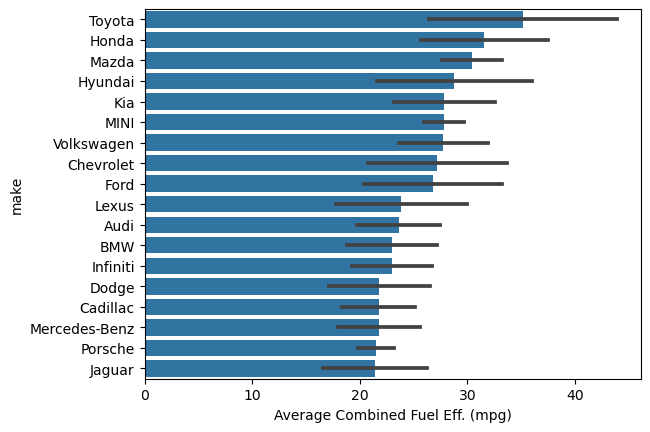

In [8]:
# run this cell to check your work against ours
additionalplot_solution_2()